# Chapter 10 — CellBender Basic Analysis

### Objective

In this chapter, we AnnDatas from previous chapters and create plots from the QC metrics computed by Scanpy, as well as some simple gene set enrichment analysis (apotosis and housekeeping genes). We will be using the CellBender data that we generated after Chapter 08.

This includes:

- Reading in AnnDatas from the correct input directory
- Plotting histograms and violin plots for every relevant metric in adata.obs
- Saving the AnnDatas with updated gene set enrichment analysis to the correct output directory

### Data Inputs and Outputs

- AnnDatas will come from "adatas/adatas_X_cellbender_raw_filtered"
- Updated AnnDatas will be outputed to "adatas/adatas_X_cellbender_raw_with_gene_metrics_filtered"
- Figures will be outputted to "figures/chapter_10_cellbender_basic_analysis"


##### Run Autoreload (Automically Reloads Edited Module Files)

In [1]:
%load_ext autoreload
%autoreload 2

#### Imports

In [2]:
import os
import scanpy as sc
from typing import List, Tuple, Dict
from cellbender.remove_background.downstream import anndata_from_h5

import utils
import utils.config as config

## File Paths and Metadata

In [3]:
# File and directory paths
figures_output_dir = config.FIGURES_DIR / "chapter_10_cellbender_basic_analysis"
input_adata_dir = config.ADATA_DIR / "adatas_X_cellbender_raw_filtered"
output_adata_dir = config.ADATA_DIR / "adatas_X_cellbender_raw_with_gene_metrics_filtered"

# Make sure output directories exist
os.makedirs(figures_output_dir, exist_ok=True)
os.makedirs(output_adata_dir, exist_ok=True)

### Read in AnnDatas

In [4]:
# Load AnnData objects
adata_dict = {}
sample_metadata = config.SAMPLES_METADATA

for key, sample_info in sample_metadata.items():
    tissue = sample_info["tissue"]
    protocol = sample_info["protocol"]

    file_path = os.path.join(
        input_adata_dir,
        f"{key}_cellbender_corrected_output_filtered.h5",
    )

    adata = anndata_from_h5(file_path)
    adata_dict[key] = adata
    print(f"{key}: {adata}")

Assuming we are loading a "filtered" file that contains only cells.


/usersoftware/peerd/ghoshr/.conda/envs/benchmarking_template/lib/python3.12/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


SF_N: AnnData object with n_obs × n_vars = 6133 × 38606
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'
Assuming we are loading a "filtered" file that contains only cells.


/usersoftware/peerd/ghoshr/.conda/envs/benchmarking_template/lib/python3.12/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


SL_N: AnnData object with n_obs × n_vars = 7668 × 38606
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'
Assuming we are loading a "filtered" file that contains only cells.


/usersoftware/peerd/ghoshr/.conda/envs/benchmarking_template/lib/python3.12/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


SF_T: AnnData object with n_obs × n_vars = 5268 × 38606
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'
Assuming we are loading a "filtered" file that contains only cells.


/usersoftware/peerd/ghoshr/.conda/envs/benchmarking_template/lib/python3.12/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


SL_T: AnnData object with n_obs × n_vars = 6851 × 38606
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'
Assuming we are loading a "filtered" file that contains only cells.


/usersoftware/peerd/ghoshr/.conda/envs/benchmarking_template/lib/python3.12/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


SF_LN: AnnData object with n_obs × n_vars = 5373 × 38606
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'
Assuming we are loading a "filtered" file that contains only cells.


/usersoftware/peerd/ghoshr/.conda/envs/benchmarking_template/lib/python3.12/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


SL_LN: AnnData object with n_obs × n_vars = 9461 × 38606
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'


### Calculate QC Metrics

In [5]:
def run_qc_metrics(adata) -> None:
    """
    Compute standard quality control (QC) metrics on an AnnData object.

    Args:
        adata (AnnData): Annotated data matrix of shape n_obs x n_vars.

    Returns:
        None: Modifies the input AnnData object in-place by adding QC metrics to `adata.obs` and `adata.var`.
    """

    sc.pp.calculate_qc_metrics(
        adata,
        inplace=True,
        percent_top=None,
    )

    adata.var_names_make_unique()
    adata.obs_names_make_unique()

    sc.pp.filter_cells(adata, min_counts=500) # Filter cells with fewer than 500 counts (matches 10x Filtered Cells cutoff)
    return


# Run QC metrics on each dataset
for adata in adata_dict.values():
    run_qc_metrics(adata)
    print(adata)

AnnData object with n_obs × n_vars = 4483 × 38606
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'barcode_indices_for_latents', 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'barcodes_analyzed', 'barcodes_analyzed_inds', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'
AnnD

### Generate Plots

#### Plot Number of Cells by Protocol Across Tissues

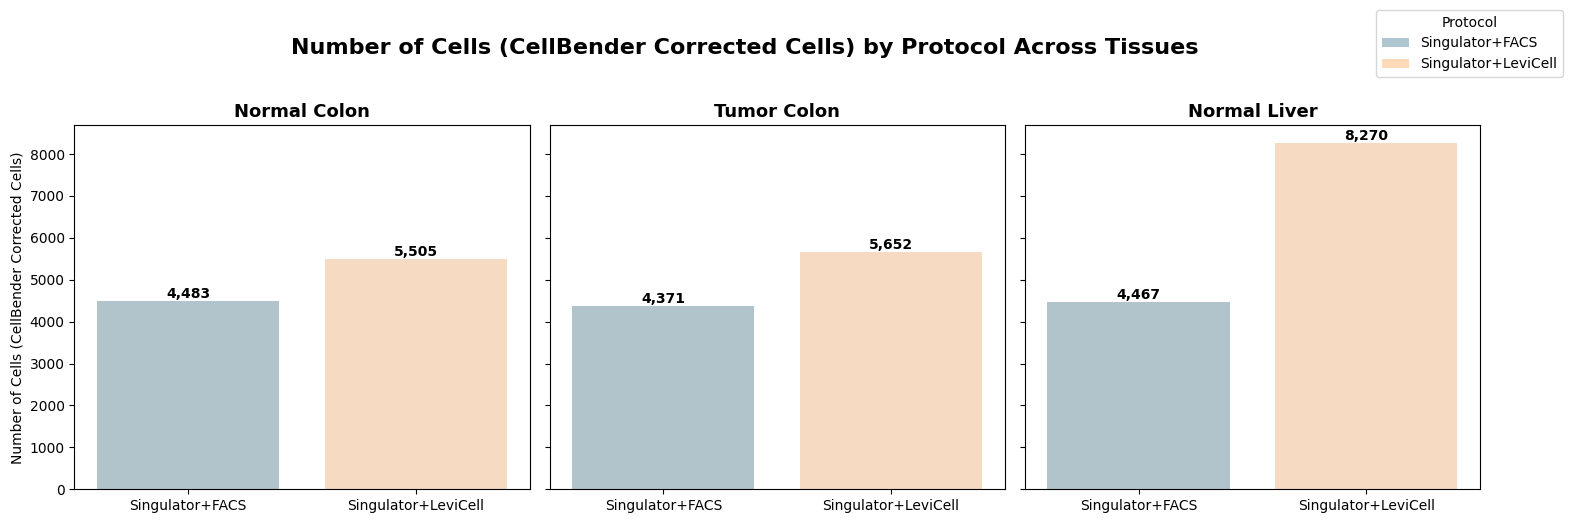

In [6]:
protocol_color_palette = config.PROTOCOL_COLOR_PALETTE
tissue_order = config.TISSUE_ORDER

# Plot number of cells
fig = utils.plot_scalar_metric(
    data_dict=adata_dict,
    metadata=sample_metadata,
    metric_func=lambda adata: adata.n_obs,
    metric_label="Number of Cells (CellBender Corrected Cells)",
    protocol_color_palette=protocol_color_palette,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(os.path.join(figures_output_dir, "num_cells.png"), bbox_inches="tight")

### Plot Total UMIs

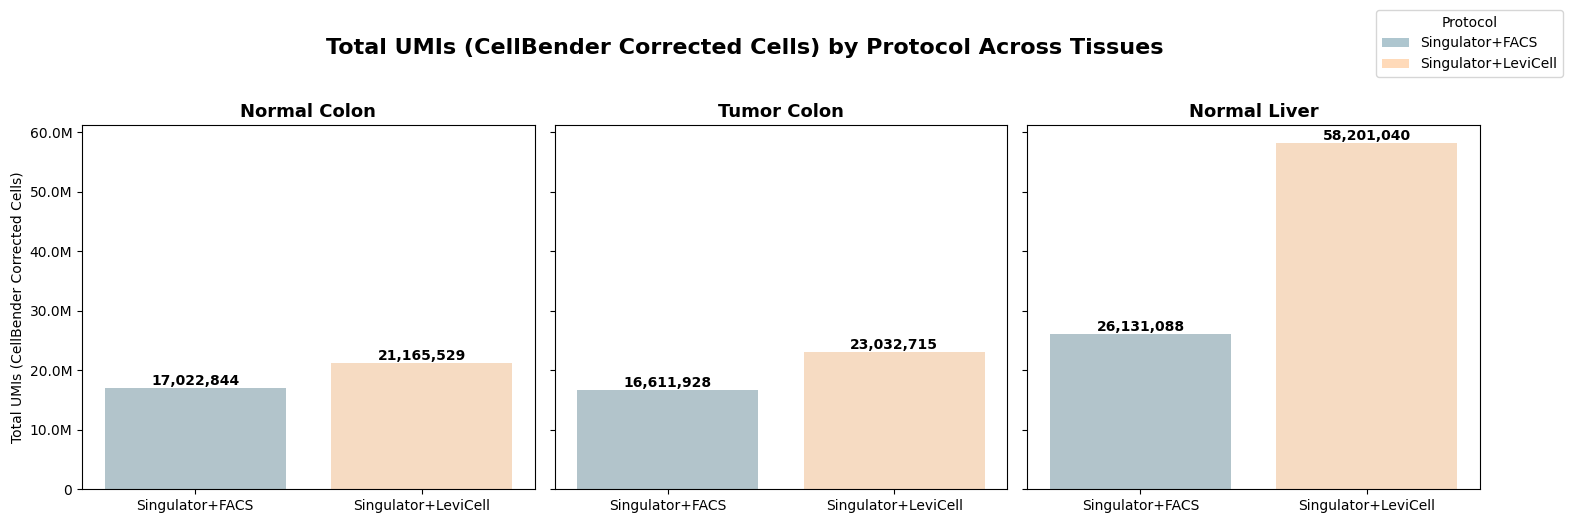

In [7]:
# Plot total UMIs
fig = utils.plot_scalar_metric(
    data_dict=adata_dict,
    metadata=sample_metadata,
    metric_func=lambda adata: adata.X.sum(),
    metric_label="Total UMIs (CellBender Corrected Cells)",
    protocol_color_palette=protocol_color_palette,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(os.path.join(figures_output_dir, "total_umis.png"), bbox_inches="tight")

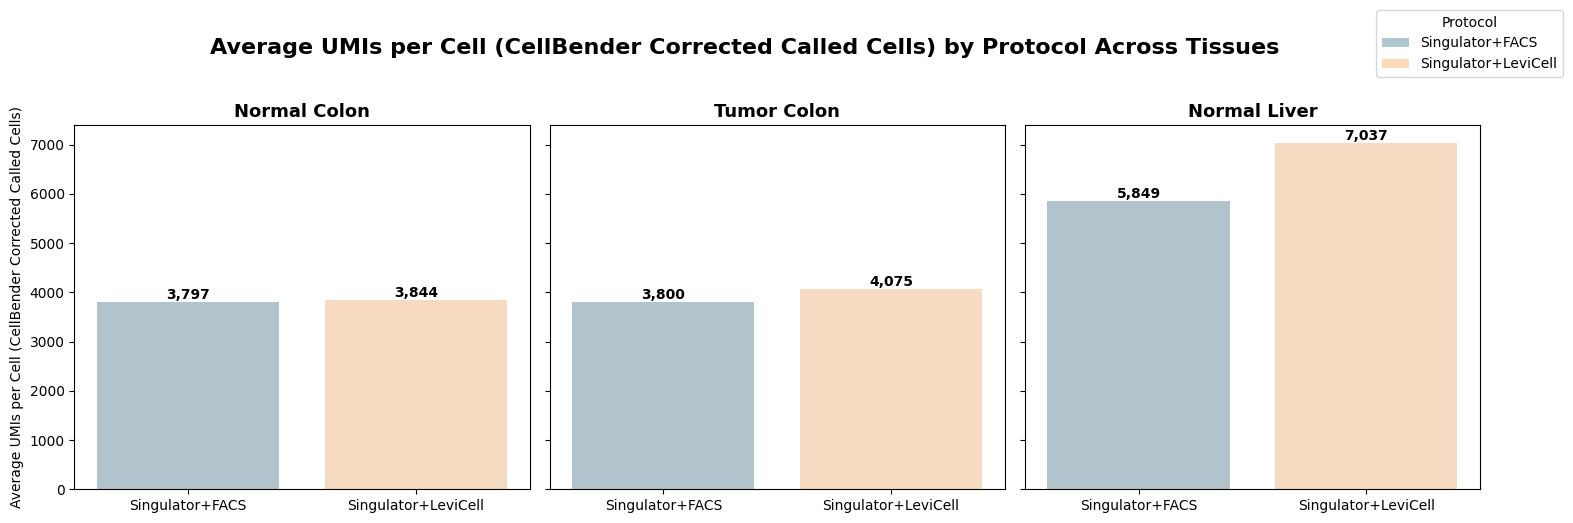

In [8]:
# Plot average UMIs per cell
fig = utils.plot_scalar_metric(
    data_dict=adata_dict,
    metadata=sample_metadata,
    metric_func=lambda adata: adata.X.sum() / adata.n_obs,
    metric_label="Average UMIs per Cell (CellBender Corrected Called Cells)",
    protocol_color_palette=protocol_color_palette,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "average_umis_per_cell.png"), bbox_inches="tight"
)

### Plot Library Size Distribution

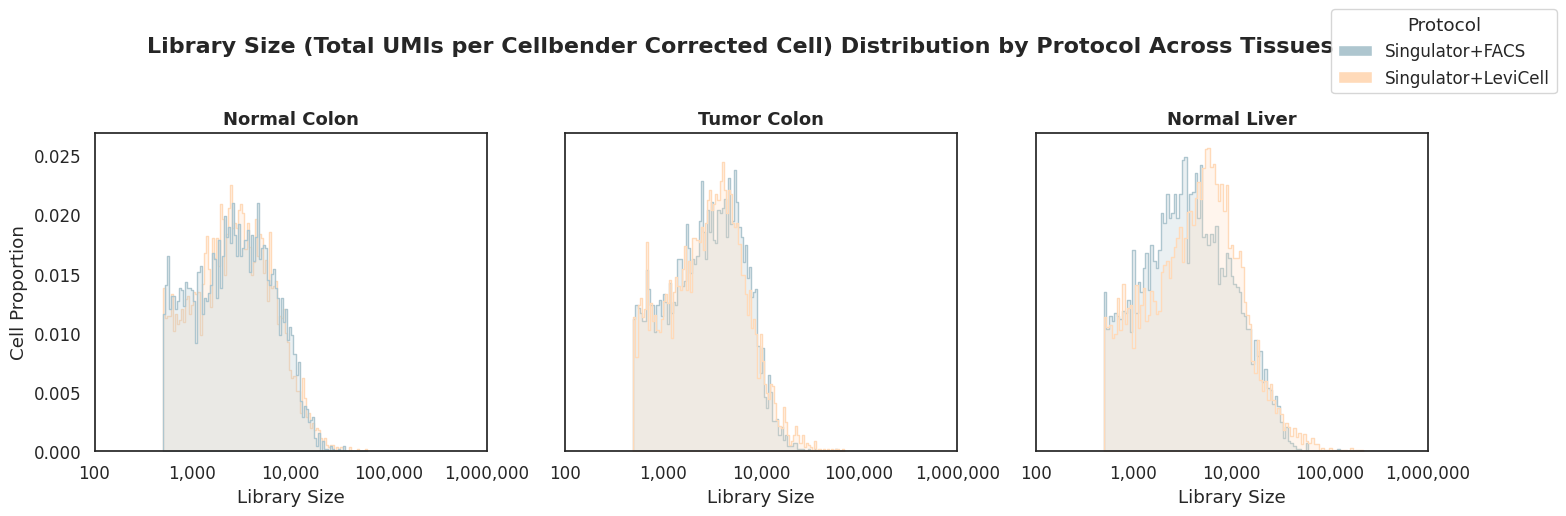

In [9]:
# Plot library size histogram
fig = utils.plot_adata_metric_histogram(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="total_counts",
    axis="obs",
    log_x=True,
    x_label="Library Size",
    title="Library Size (Total UMIs per Cellbender Corrected Cell) Distribution by Protocol Across Tissues",
    protocol_color_palette=protocol_color_palette,
    proportion=True,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "library_size_hist.png"), bbox_inches="tight"
)

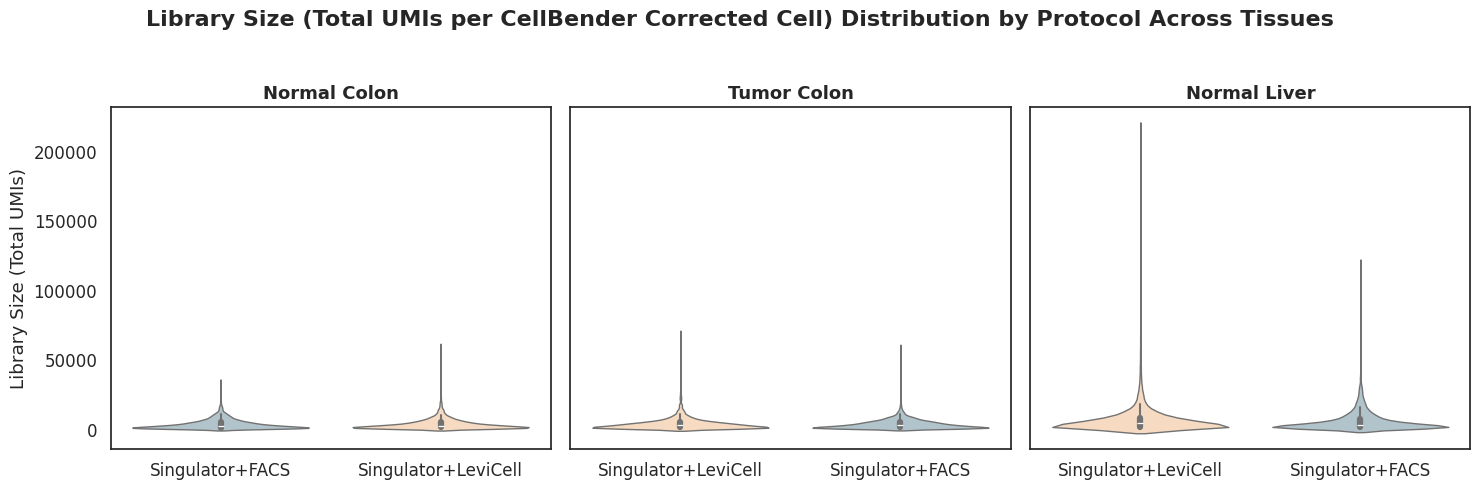

In [10]:
# Plot library size violin plot
fig = utils.plot_adata_metric_violin(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="total_counts",
    axis="obs",
    y_label="Library Size (Total UMIs)",
    title="Library Size (Total UMIs per CellBender Corrected Cell) Distribution by Protocol Across Tissues",
    log_y=False,
    protocol_color_palette=protocol_color_palette,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "library_size_violin.png"), bbox_inches="tight"
)

### Plot Number of Genes per Cell

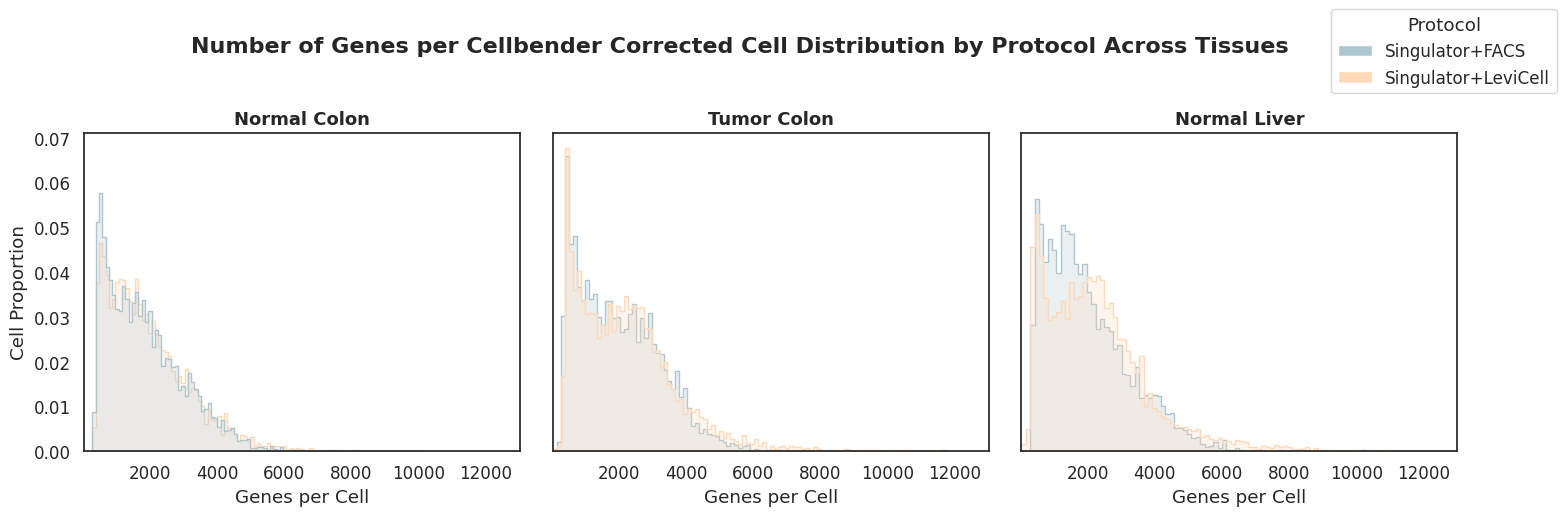

In [11]:
# Plot number of genes per cell
fig = utils.plot_adata_metric_histogram(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="n_genes_by_counts",
    axis="obs",
    log_x=False,
    x_label="Genes per Cell",
    title="Number of Genes per Cellbender Corrected Cell Distribution by Protocol Across Tissues",
    protocol_color_palette=protocol_color_palette,
    proportion=True,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "genes_per_cell_hist.png"), bbox_inches="tight"
)

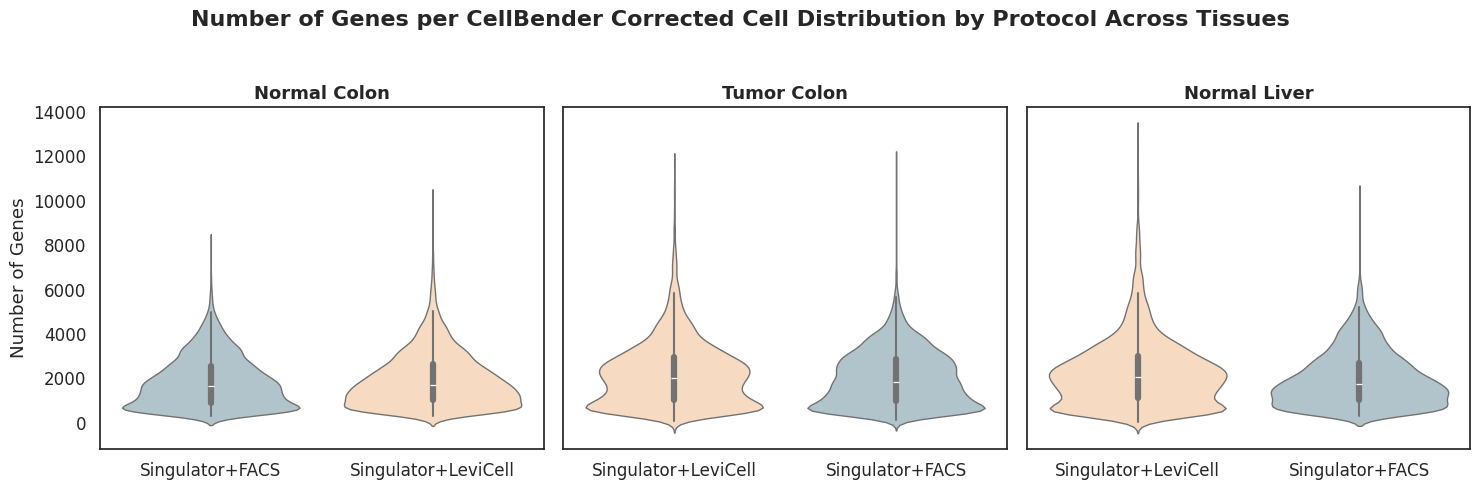

In [12]:
# Plot number of genes per cell violin plot
fig = utils.plot_adata_metric_violin(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="n_genes_by_counts",
    axis="obs",
    y_label="Number of Genes",
    title="Number of Genes per CellBender Corrected Cell Distribution by Protocol Across Tissues",
    log_y=False,
    protocol_color_palette=protocol_color_palette,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "genes_per_cell_violin.png"), bbox_inches="tight"
)

### Gene Detection

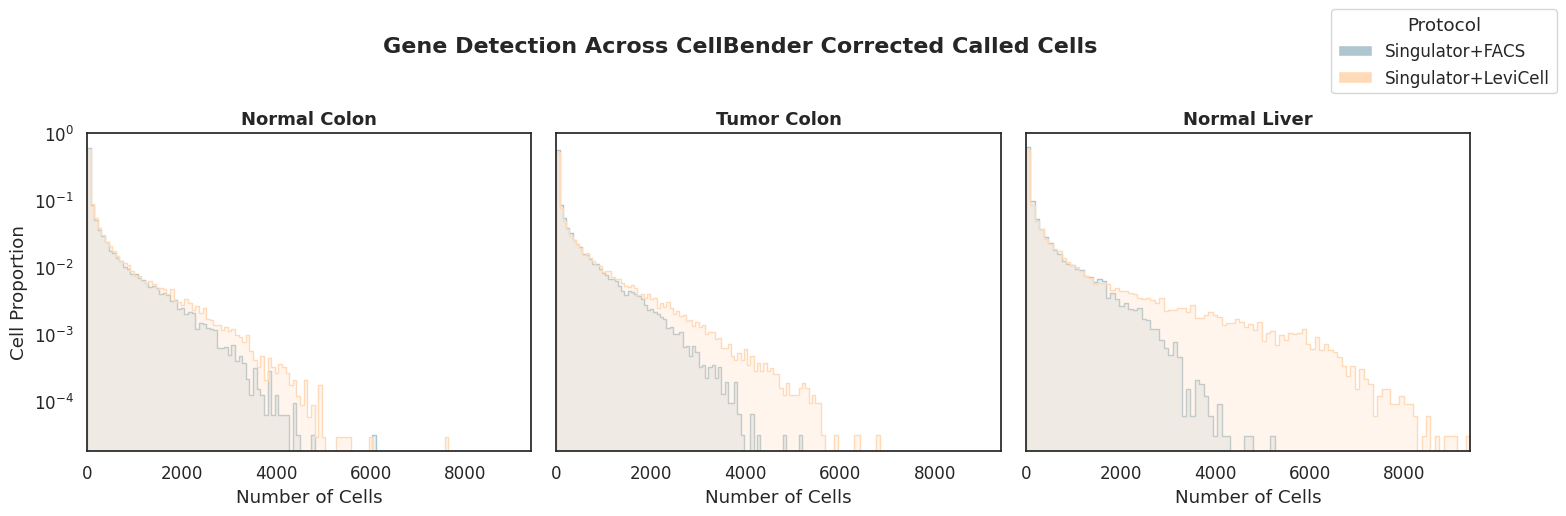

In [13]:
# Plot number of cells per gene histogram
fig = utils.plot_adata_metric_histogram(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="n_cells_by_counts",
    axis="var",
    log_x=False,
    log_y=True,
    x_label="Number of Cells",
    title="Gene Detection Across CellBender Corrected Called Cells",
    protocol_color_palette=protocol_color_palette,
    proportion=True,
)

# Save the figure
fig.savefig(os.path.join(figures_output_dir, "gene_detection.png"), bbox_inches="tight")

### Compute Mitochondiral and Ribosomal Gene Count Percentages

#### Functions

- compute_gene_category_qc_metrics: Annotates genes based ona a pattern (eg. "MT-" for human mitochondrial)
- add_gene_set_content_to_adata_dict: Takes in a set of genes and computes the percent content of those genes on a per cell basis

In [14]:
def compute_gene_category_qc_metrics(
    adata_dict: Dict[str, sc.AnnData],
    category_label: str,
    pattern: str | List[str] | Tuple[str],
) -> None:
    """
    Annotate genes based on a pattern and compute QC metrics for each AnnData in the dict.

    Args:
        adata_dict: dict with keys like 'sf_t', 'sl_t', etc. and values as AnnData objects
        category_label: name of the category to annotate (e.g., "mitochondrial", "ribosomal")
        pattern: prefix string, tuple of prefixes, or list of prefixes to match gene names
    """
    for adata in adata_dict.values():
        adata.var[category_label] = adata.var_names.str.startswith(pattern)
        sc.pp.calculate_qc_metrics(
            adata,
            qc_vars=[category_label],
            percent_top=None,
            log1p=False,
            inplace=True,
        )
    return


def add_gene_set_content_to_adatas(
    adata_dict: Dict[str, sc.AnnData], gene_set: List[str], gene_set_name: str
) -> None:
    """
    Annotate and compute percent content for a specific gene set (e.g. apoptosis or housekeeping)
    across all AnnData objects in a dictionary.

    Args:
        adata_dict: dict of AnnData objects keyed by sample label
        gene_set: list of gene symbols representing the gene set
        gene_set_name: string label for the gene set (e.g., 'apoptosis', 'housekeeping')
    """
    for adata in adata_dict.values():
        filtered_genes = list(set(gene_set) & set(adata.var_names))
        print(
            f"{adata.obs.shape[0]} cells | {len(filtered_genes)} {gene_set_name} genes found"
        )

        # Mark genes belonging to the gene set
        adata.var[gene_set_name] = adata.var_names.isin(filtered_genes)

        # Calculate percent content using scanpy
        sc.pp.calculate_qc_metrics(
            adata, qc_vars=[gene_set_name], percent_top=None, log1p=False, inplace=True
        )

    return

#### Compute Gene Percentage Metrics

In [15]:
# Compute mitochondrial QC metrics
compute_gene_category_qc_metrics(
    adata_dict=adata_dict, category_label="mitochondrial", pattern="MT-"
)

# Compute ribosomal QC metrics
compute_gene_category_qc_metrics(
    adata_dict=adata_dict, category_label="ribosomal", pattern=("RPS", "RPL")
)

### Plot Mitochondrial Results

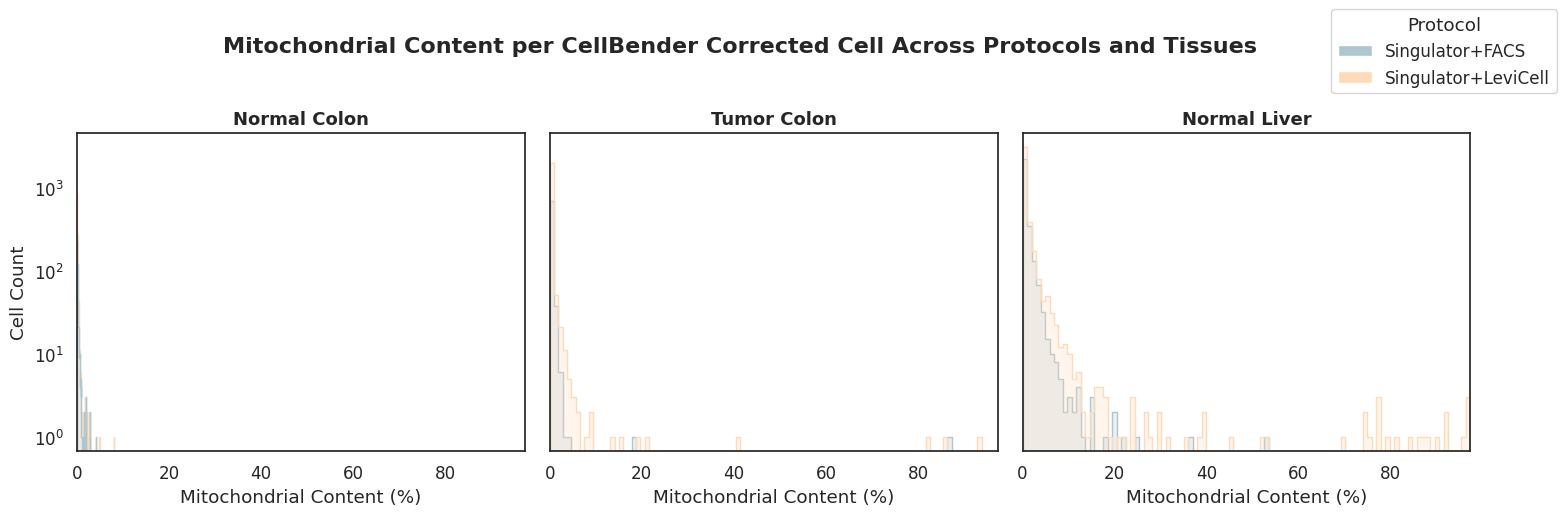

In [16]:
# Plot mitochondrial content percentage histogram
fig = utils.plot_adata_metric_histogram(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="pct_counts_mitochondrial",
    axis="obs",
    log_x=False,
    log_y=True,
    x_label="Mitochondrial Content (%)",
    title="Mitochondrial Content per CellBender Corrected Cell Across Protocols and Tissues",
    protocol_color_palette=protocol_color_palette,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "mitochondrial_percentage_hist.png"),
    bbox_inches="tight",
)

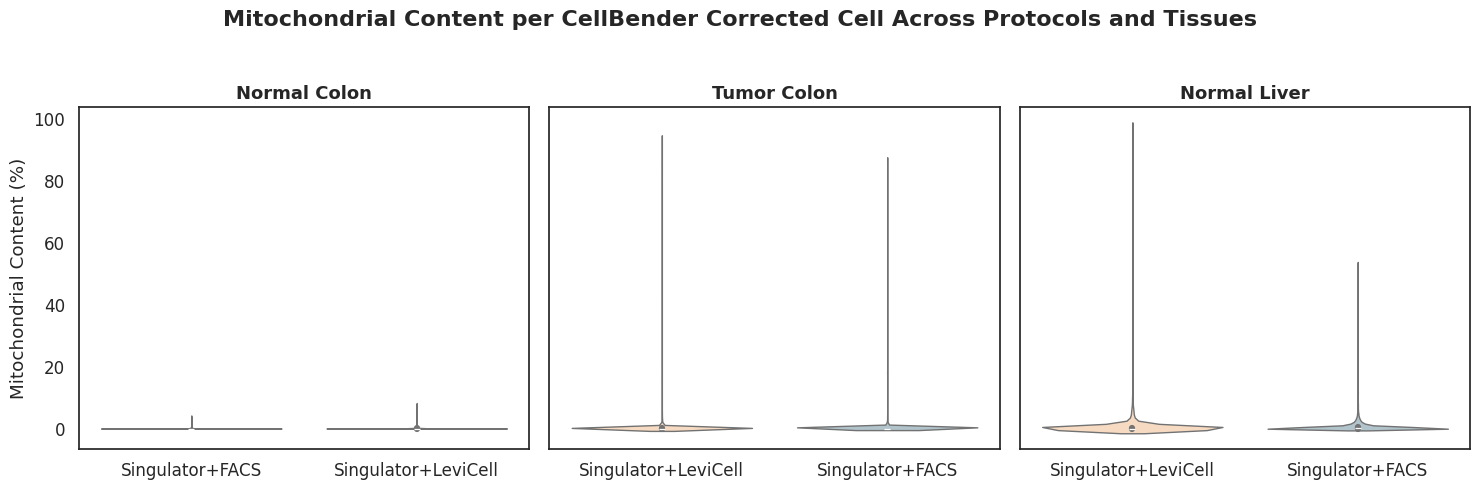

In [17]:
# Plot mitochondrial content percentage violin plot
fig = utils.plot_adata_metric_violin(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="pct_counts_mitochondrial",
    axis="obs",
    log_y=False,
    y_label="Mitochondrial Content (%)",
    title="Mitochondrial Content per CellBender Corrected Cell Across Protocols and Tissues",
    protocol_color_palette=protocol_color_palette,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "mitochondrial_percentage_violin.png"),
    bbox_inches="tight",
)

### Plot Ribosomal Results

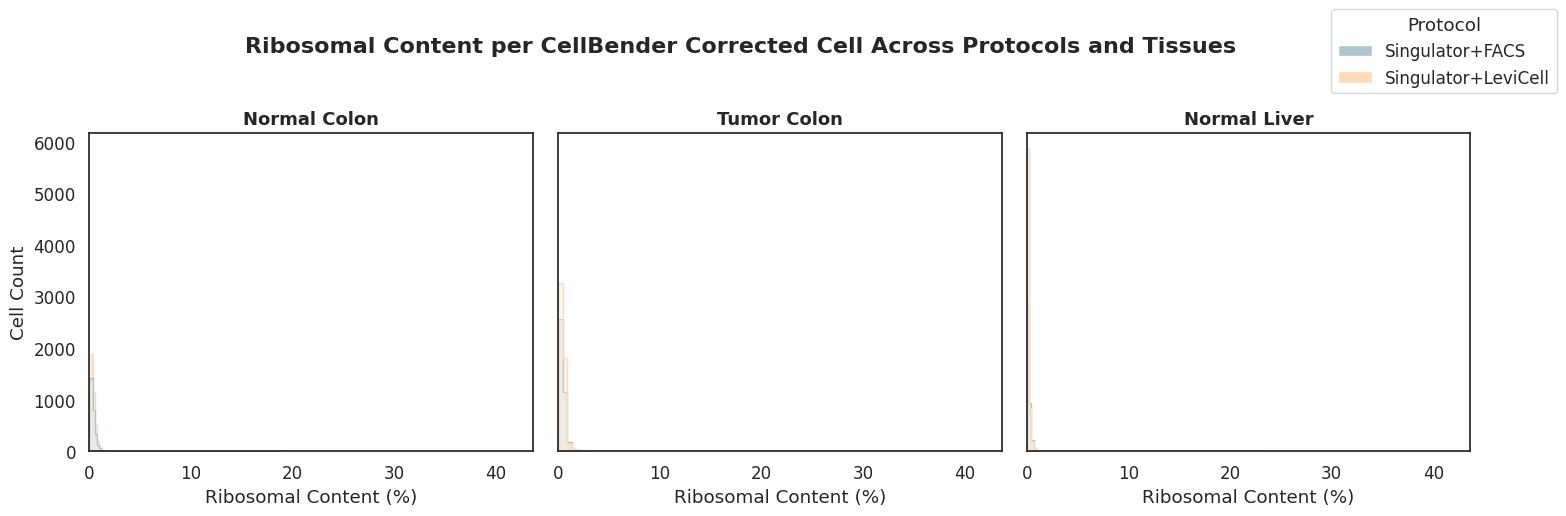

In [18]:
# Plot ribosomal content percentage histogram
fig = utils.plot_adata_metric_histogram(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="pct_counts_ribosomal",
    axis="obs",
    log_x=False,
    log_y=False,
    x_label="Ribosomal Content (%)",
    title="Ribosomal Content per CellBender Corrected Cell Across Protocols and Tissues",
    protocol_color_palette=protocol_color_palette,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "ribosomal_percentage_hist.png"),
    bbox_inches="tight",
)

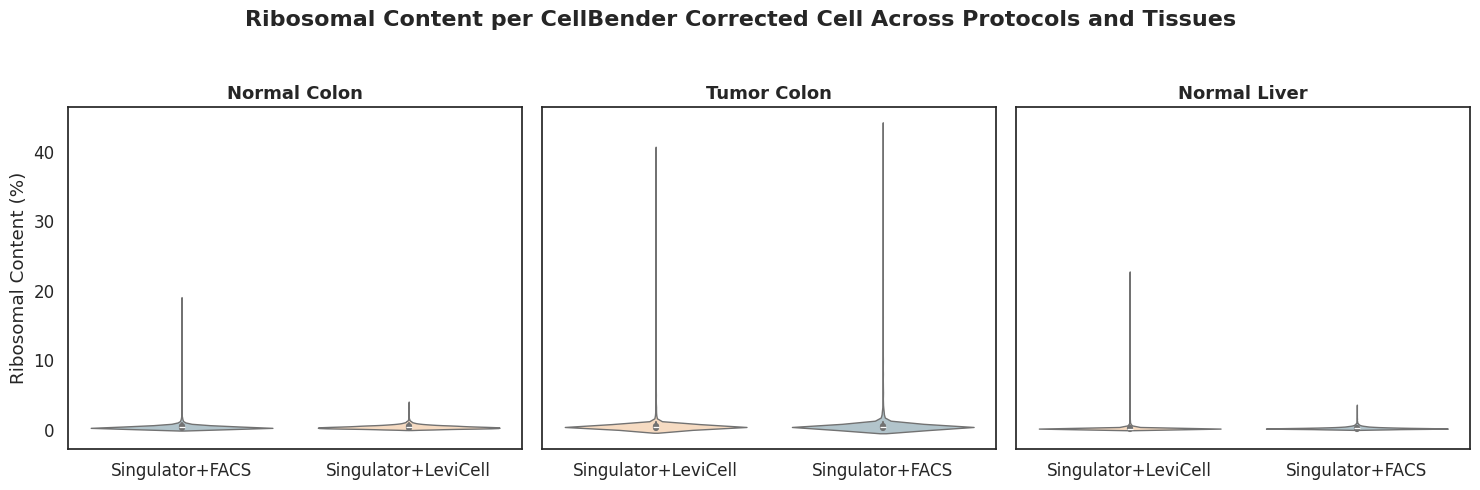

In [19]:
# Plot ribosomal content percentage violin plot
fig = utils.plot_adata_metric_violin(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="pct_counts_ribosomal",
    axis="obs",
    log_y=False,
    y_label="Ribosomal Content (%)",
    title="Ribosomal Content per CellBender Corrected Cell Across Protocols and Tissues",
    protocol_color_palette=protocol_color_palette,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "ribosomal_percentage_violin.png"),
    bbox_inches="tight",
)

### Compare Gene Set Content

#### Run functions

In [20]:
gene_set_info_dir = config.GENE_SET_INFO_DIR

# Load apoptosis gene list (from Rahul)
with open(os.path.join(gene_set_info_dir, "apoptosis_genes.txt")) as f:
    apoptosis_genes = f.read().splitlines()

# Load housekeeping gene list from (https://www.gsea-msigdb.org/gsea/msigdb/cards/HOUNKPE_HOUSEKEEPING_GENES)
with open(os.path.join(gene_set_info_dir, "housekeeping_genes.txt")) as f:
    housekeeping_genes = f.read().splitlines()
# Annotate and compute
add_gene_set_content_to_adatas(adata_dict = adata_dict, gene_set= apoptosis_genes, gene_set_name="apoptosis")
add_gene_set_content_to_adatas(
    adata_dict = adata_dict, gene_set= housekeeping_genes, gene_set_name="housekeeping"
)

4483 cells | 159 apoptosis genes found
5505 cells | 159 apoptosis genes found
4371 cells | 159 apoptosis genes found
5652 cells | 159 apoptosis genes found
4467 cells | 159 apoptosis genes found
8270 cells | 159 apoptosis genes found
4483 cells | 1129 housekeeping genes found
5505 cells | 1129 housekeeping genes found
4371 cells | 1129 housekeeping genes found
5652 cells | 1129 housekeeping genes found
4467 cells | 1129 housekeeping genes found
8270 cells | 1129 housekeeping genes found


### Plot Apoptosis Results

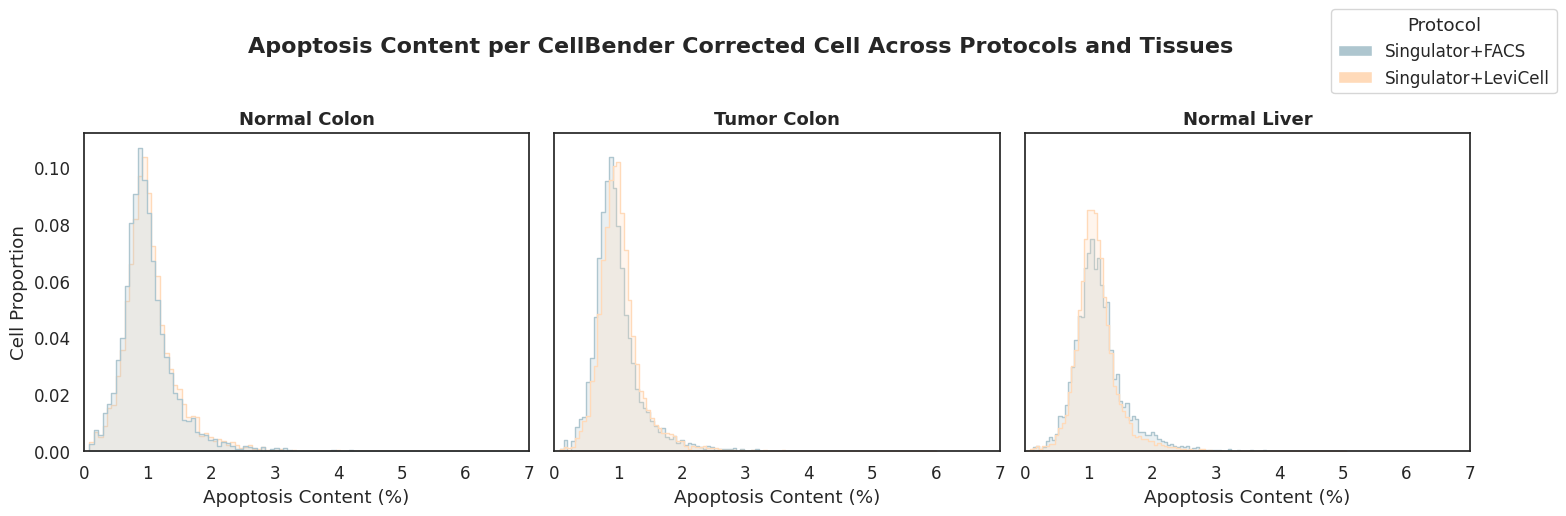

In [21]:
# Plot apoptosis content percentage histogram
fig = utils.plot_adata_metric_histogram(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="pct_counts_apoptosis",
    axis="obs",
    log_x=False,
    log_y=False,
    x_label="Apoptosis Content (%)",
    title="Apoptosis Content per CellBender Corrected Cell Across Protocols and Tissues",
    protocol_color_palette=protocol_color_palette,
    proportion=True,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "apoptosis_percentage_hist.png"),
    bbox_inches="tight",
)

### Plot Housekeeping Results

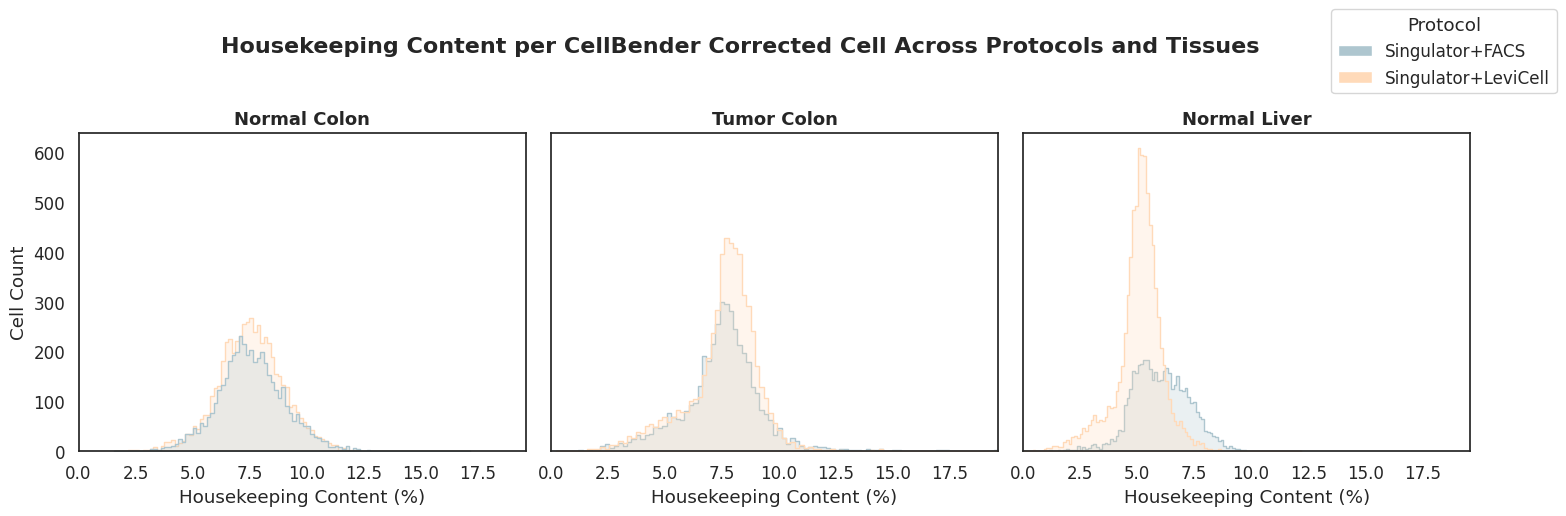

In [22]:
# Plot housekeeping content percentage histogram
fig = utils.plot_adata_metric_histogram(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="pct_counts_housekeeping",
    axis="obs",
    log_x=False,
    log_y=False,
    x_label="Housekeeping Content (%)",
    title="Housekeeping Content per CellBender Corrected Cell Across Protocols and Tissues",
    protocol_color_palette=protocol_color_palette,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "housekeeping_percentage_hist.png"),
    bbox_inches="tight",
)

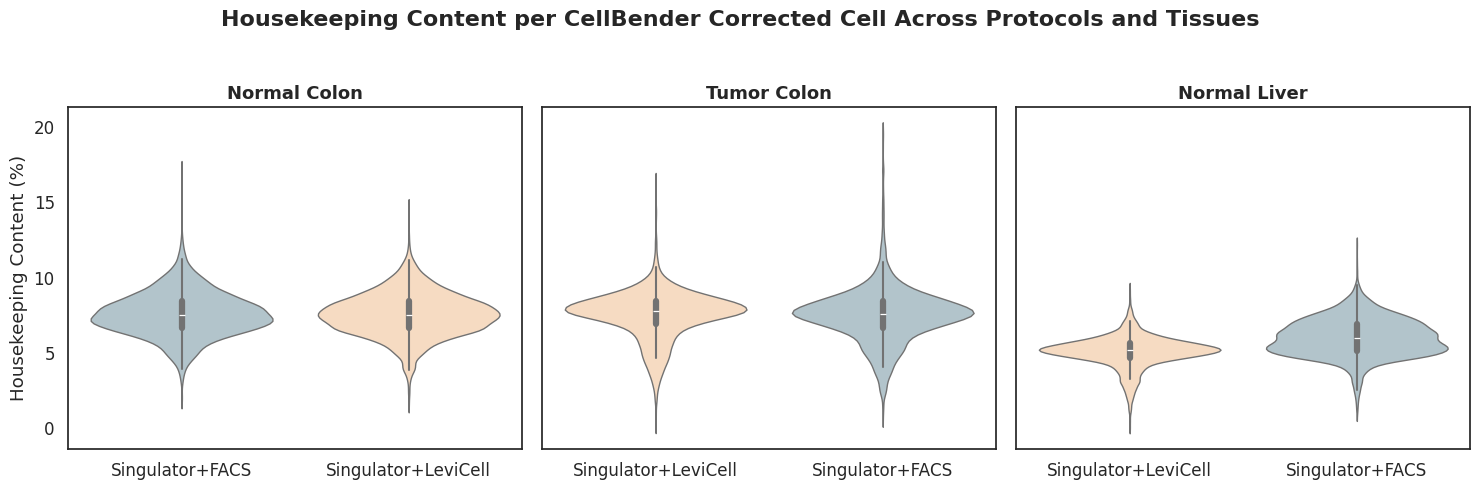

In [23]:
# Plot housekeeping content percentage violin plot
fig = utils.plot_adata_metric_violin(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    field="pct_counts_housekeeping",
    axis="obs",
    log_y=False,
    y_label="Housekeeping Content (%)",
    title="Housekeeping Content per CellBender Corrected Cell Across Protocols and Tissues",
    protocol_color_palette=protocol_color_palette,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "housekeeping_percentage_violin.png"),
    bbox_inches="tight",
)

### Plot Ambient RNA Results from CellBender

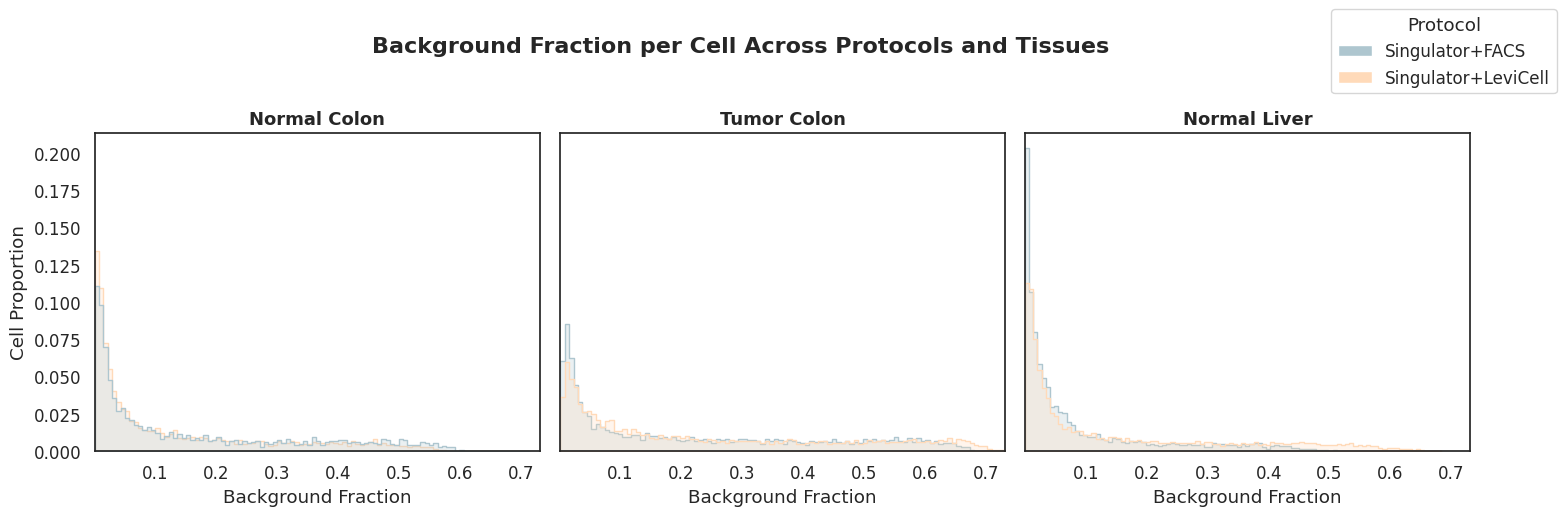

In [27]:
# Plot housekeeping content percentage
fig = utils.plot_adata_metric_histogram(
    adata_dict,
    sample_metadata=sample_metadata,
    field="background_fraction",
    axis="obs",
    log_x=False,
    log_y=False,
    proportion=True,
    x_label="Background Fraction",
    title="Background Fraction per Cell Across Protocols and Tissues",
    protocol_color_palette=protocol_color_palette,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "background_fraction.png"),
    bbox_inches="tight",
)

In [ ]:
fig = utils.plot_obs_scatter_by_tissue(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    x_field="total_counts",
    y_field="background_fraction",
    log_x=True,
    log_y=False,
    title="Library Size vs Background Fraction by Tissue",
    protocol_color_palette=protocol_color_palette,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "library_size_vs_background_fraction.png"),
    bbox_inches="tight",
)

KeyError: 'Background Fraction'

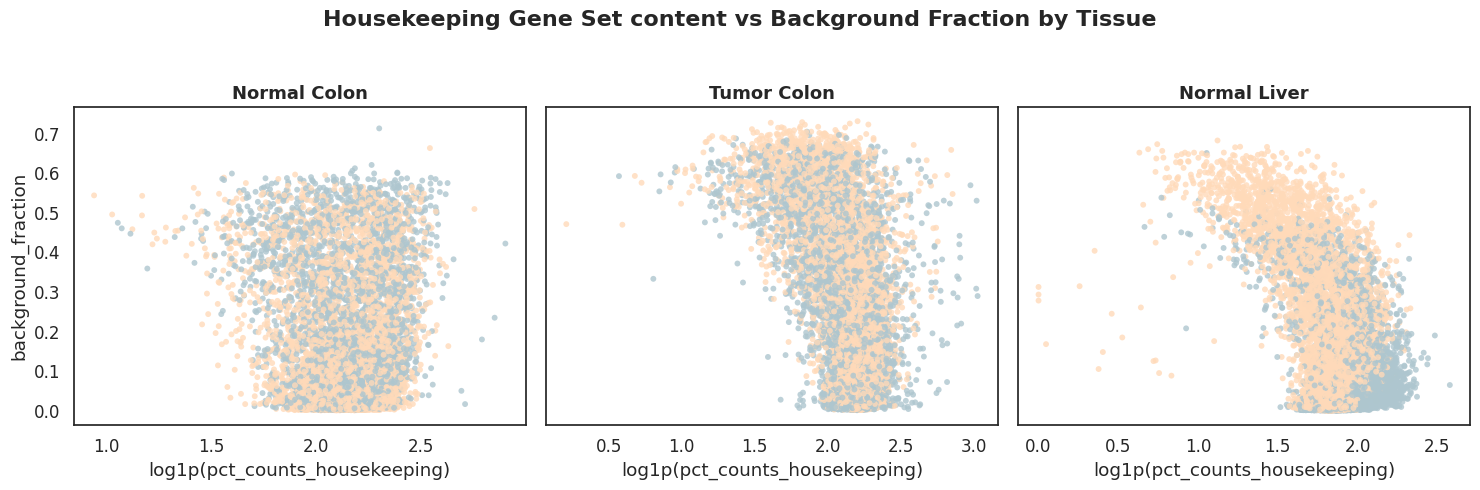

In [38]:
fig = utils.plot_obs_scatter_by_tissue(
    adata_dict=adata_dict,
    sample_metadata=sample_metadata,
    x_field="pct_counts_housekeeping",
    y_field="background_fraction",
    log_x=True,
    log_y=False,
    title="Housekeeping Gene Set content vs Background Fraction by Tissue",
    protocol_color_palette=protocol_color_palette,
    tissue_order=tissue_order,
)

# Save the figure
fig.savefig(
    os.path.join(figures_output_dir, "housekeeping_gene_set_content_vs_background_fraction.png"),
    bbox_inches="tight",
)

## Save AnnDatas to File

In [33]:
for key, sample_info in sample_metadata.items():
    tissue = sample_info["tissue"]
    protocol = sample_info["protocol"]

    out_path = os.path.join(output_adata_dir, f"{key}_adata.h5ad")
    adata_dict[key].write(out_path)
    print(f"Saved {key}_adata to {out_path}")

Saved SF_N_adata to /data1/collab002/sail/projects/ongoing/benchmarks/sail-benchmarking-template/utils/../data/adatas/adatas_X_cellbender_raw_with_gene_metrics_filtered/SF_N_adata.h5ad
Saved SL_N_adata to /data1/collab002/sail/projects/ongoing/benchmarks/sail-benchmarking-template/utils/../data/adatas/adatas_X_cellbender_raw_with_gene_metrics_filtered/SL_N_adata.h5ad
Saved SF_T_adata to /data1/collab002/sail/projects/ongoing/benchmarks/sail-benchmarking-template/utils/../data/adatas/adatas_X_cellbender_raw_with_gene_metrics_filtered/SF_T_adata.h5ad
Saved SL_T_adata to /data1/collab002/sail/projects/ongoing/benchmarks/sail-benchmarking-template/utils/../data/adatas/adatas_X_cellbender_raw_with_gene_metrics_filtered/SL_T_adata.h5ad
Saved SF_LN_adata to /data1/collab002/sail/projects/ongoing/benchmarks/sail-benchmarking-template/utils/../data/adatas/adatas_X_cellbender_raw_with_gene_metrics_filtered/SF_LN_adata.h5ad
Saved SL_LN_adata to /data1/collab002/sail/projects/ongoing/benchmarks/sa